## 1. Introduction

This project analyzes student feedback collected through a survey to understand overall satisfaction with college events and academic sessions. The objective is to identify strengths, highlight areas for improvement, and provide actionable recommendations using data analysis techniques.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


## 2. Dataset Overview

The dataset contains student feedback survey responses. Each row represents a student’s feedback across multiple evaluation criteria such as subject knowledge, clarity of explanation, assignment difficulty, and overall recommendation relevance.

In [51]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

## 3. Data Cleaning

Data cleaning was performed to ensure consistency and accuracy. This includes handling missing values, converting data types, and standardizing column names.

In [52]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [53]:
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

In [54]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [55]:
rating_cols = df.columns.drop(['student_id'], errors='ignore')

for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [56]:
df.fillna(df.mean(), inplace=True)

## 4. Exploratory Data Analysis

Exploratory Data Analysis (EDA) was conducted to understand the distribution and variation of student feedback ratings.

In [57]:
df.describe()

,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 5. Satisfaction Analysis

An overall satisfaction score was calculated for each student by averaging all feedback ratings. This provides a single metric to measure overall satisfaction.

In [58]:
rating_cols = df.columns.drop(['student_id'], errors='ignore')

df['overall_satisfaction'] = df[rating_cols].mean(axis=1)

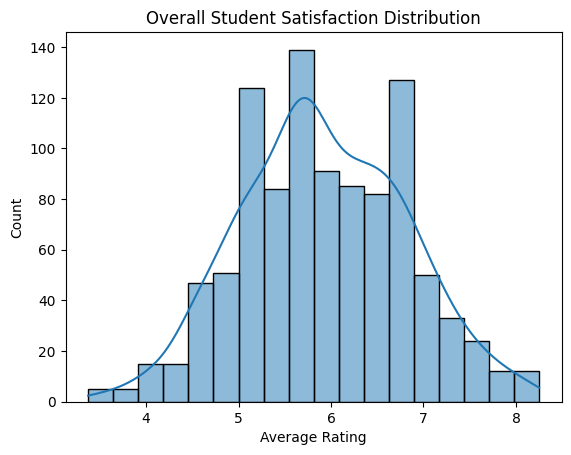

In [59]:
sns.histplot(df['overall_satisfaction'], kde=True)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

### Average Rating per Feedback Question

To understand how students rated each individual feedback parameter, the average rating for every survey question was calculated. This helps identify strengths and areas that require improvement at a granular level.

In [60]:
avg_ratings = df[rating_cols].mean().sort_values(ascending=False)
avg_ratings

,0
well_versed_with_the_subject,7.497502
explains_concepts_in_an_understandable_way,6.081918
use_of_presentations,5.942058
provides_support_for_students_going_above_and_beyond,5.662338
structuring_of_the_course,5.636364
course_recommendation_based_on_relevance,5.598402
solves_doubts_willingly,5.474525
degree_of_difficulty_of_assignments,5.430569


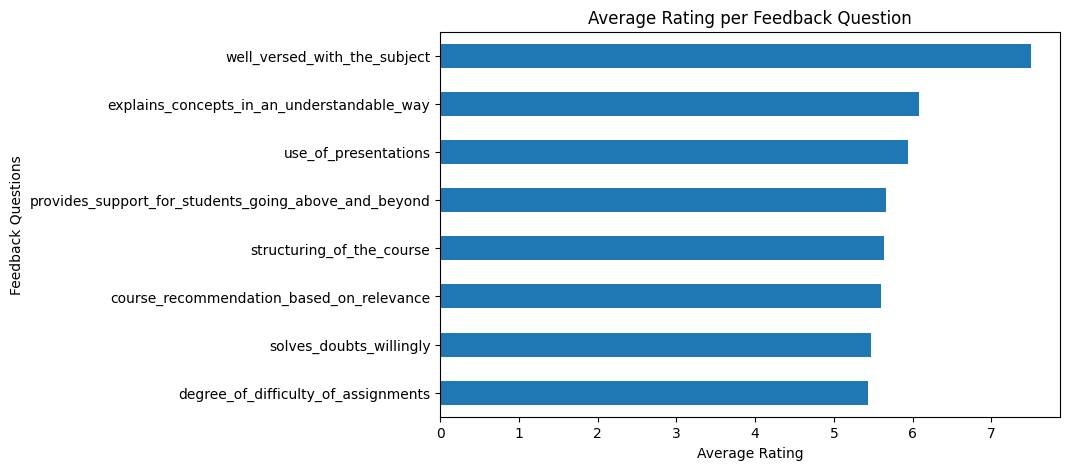

In [61]:
plt.figure(figsize=(8,5))
avg_ratings.sort_values().plot(kind='barh')
plt.xlabel("Average Rating")
plt.ylabel("Feedback Questions")
plt.title("Average Rating per Feedback Question")
plt.show()

In [62]:
strengths = avg_ratings[avg_ratings >= 3.5]
weaknesses = avg_ratings[avg_ratings < 3.5]

strengths, weaknesses

(well_versed_with_the_subject                            7.497502
 explains_concepts_in_an_understandable_way              6.081918
 use_of_presentations                                    5.942058
 provides_support_for_students_going_above_and_beyond    5.662338
 structuring_of_the_course                               5.636364
 course_recommendation_based_on_relevance                5.598402
 solves_doubts_willingly                                 5.474525
 degree_of_difficulty_of_assignments                     5.430569
 dtype: float64,
 Series([], dtype: float64))

**Interpretation:**
- Feedback questions with higher average ratings represent strong performance areas.
- Questions with lower average ratings highlight areas where improvements are required.
- This analysis helps prioritize actionable improvements based on student feedback.

## 6. Sentiment Analysis

Sentiment was derived from overall satisfaction scores and categorized into Positive, Neutral, and Negative to simplify interpretation.

In [63]:
def rating_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score >= 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['overall_satisfaction'].apply(rating_sentiment)

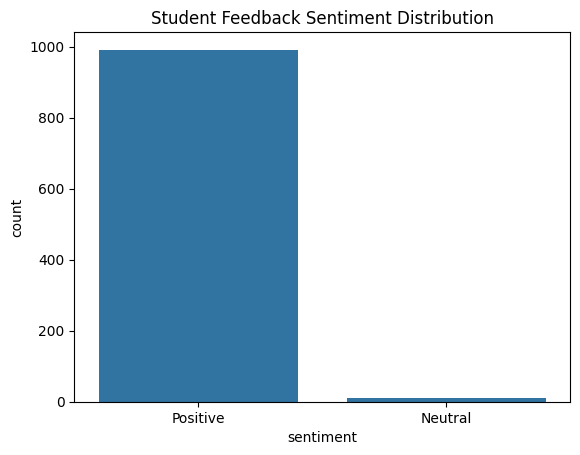

In [64]:
sns.countplot(x='sentiment', data=df)
plt.title("Student Feedback Sentiment Distribution")
plt.show()

## 7. Key Insights

- Majority of students provided positive feedback.
- Subject knowledge and explanation clarity received higher ratings.
- Assignment difficulty and course structuring require improvement.
- Neutral sentiment indicates scope for better engagement.

## 8. Recommendations

- Improve course/event structure and pacing.
- Simplify assignment difficulty.
- Increase interactive and doubt-clearing sessions.
- Enhance engagement using real-world examples and presentations.

## 9. Conclusion

This analysis highlights student satisfaction trends and identifies improvement areas using feedback data. The insights can help institutions enhance future college events and academic experiences through data-driven decisions.